In [1]:
import os #whenever u want to add path or file,call os
import urllib
import zipfile

# Download and unzip the dataset
if not os.path.isfile('.zip'):
  urllib.request.urlretrieve("https://github.com/Gurupatil0003/Brain-Tumor-Data-Set/archive/refs/heads/main.zip", "Brain-Tumor-Data-Set.zip")
#/archive/refs/heads/main.zip don't touch this.
zip_filename = "Brain-Tumor-Data-Set.zip"
with zipfile.ZipFile("Brain-Tumor-Data-Set.zip","r") as zip_ref:
    zip_ref.extractall(".")

In [2]:
#call tensorflow.
import tensorflow as tf
from tensorflow.keras.models import Sequential #calling model and the connection is one by one(sequential)
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_path="/content/Brain-Tumor-Data-Set-main/Brain Tumor Data Set/Train"
test_path="/content/Brain-Tumor-Data-Set-main/Brain Tumor Data Set/Test"

In [4]:
IMG_SIZE=64
BATCH_SIZE=32

In [5]:
Train_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    train_path, #given data
    target_size=(IMG_SIZE,IMG_SIZE), #64,64
    batch_size=BATCH_SIZE, #32
    class_mode='binary'
)
Test_data=ImageDataGenerator(rescale=1./255).flow_from_directory(
    test_path, #given data
    target_size=(IMG_SIZE,IMG_SIZE), #64,64
    batch_size=BATCH_SIZE, #32
    class_mode='binary'
)

Found 3903 images belonging to 2 classes.
Found 950 images belonging to 2 classes.


In [6]:
#removing input layer in cnn,feture extraction=convulational layer+pulling layer(it reads into half) in the input layer
from tensorflow.keras.layers import Flatten,Dense,Conv2D,MaxPool2D
model=Sequential([
    Conv2D(16,3,activation="relu",input_shape=(IMG_SIZE,IMG_SIZE,3)),
    MaxPool2D(), #cut the half 64 to 32 here
    Flatten(), #calling input layer,used for 3d purposeand here 3 is rgb
    Dense(300,activation="relu"),#300 neurons in hidden layer and dense is the connection
    Dense(1,activation="sigmoid") #1 output
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [7]:
model.compile(optimizer="adam",loss='binary_crossentropy',metrics=["accuracy"])
#model.compile(optimizer="adam",loss="sparse_categorical",metrics=["accuracy"]) in multiple class


In [8]:
model.fit(Train_data,epochs=3,validation_data=Test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/3
122/122 ━━━━━━━━━━━━━━━━━━━━ 22s 167ms/step - accuracy: 0.6051 - loss: 1.2405 - val_accuracy: 0.8074 - val_loss: 0.4239
Epoch 2/3
122/122 ━━━━━━━━━━━━━━━━━━━━ 21s 174ms/step - accuracy: 0.8662 - loss: 0.3356 - val_accuracy: 0.8916 - val_loss: 0.2815
Epoch 3/3
122/122 ━━━━━━━━━━━━━━━━━━━━ 20s 166ms/step - accuracy: 0.9367 - loss: 0.1960 - val_accuracy: 0.9158 - val_loss: 0.2479


Saving Cancer (1001).jpg to Cancer (1001).jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step


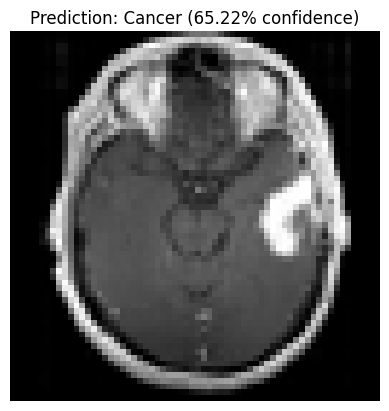

In [9]:
 #model is done,now we need to predict.we need a ui interface to check by django or flask. but here just a reference
 # Upload and Predict

from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
from PIL import Image
import io

uploaded = files.upload()

for file_name in uploaded.keys():
    img_path = file_name
    img = Image.open(img_path).resize((IMG_SIZE, IMG_SIZE))
    img_array = np.array(img) / 255.0
    #image convert into pixel by 255.0 here
    img_array = np.expand_dims(img_array, axis=0)

    # Prediction
    prediction = model.predict(img_array)[0][0]
    label = "not cancer" if prediction > 0.5 else "Cancer"
    confidence = prediction if prediction > 0.5 else 1 - prediction

    # Show Result
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {label} ({confidence:.2%} confidence)")
    plt.show()
